In [6]:
%load_ext autoreload

%autoreload 2

from lucifex.fdm import NumericSeries
from lucifex.viz import plot_line
from lucifex.io import find_dataset, find_by_parameters, proxy, load_numeric_series
from co2_dissolution_pkg.post.plot import (
    plot_colormaps, plot_timeseries, 
    plot_twinned_timeseries, plot_colormaps_mosaic,
)


DATASET = find_dataset('./data/', include='Ra=*')
PARAMETERS = 'PARAMETERS.txt'
FUNCTION_SERIES = 'FunctionSeries.h5'
CONSTANT_SERIES = 'ConstantSeries.h5'
GRID_SERIES = 'GridSeries.npz'
NUMERIC_SERIES = 'NumericSeries.npz'
FIGURES = 'figures'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
fdS: dict[tuple[float, float, float], NumericSeries] = {}

for Ra in (600, 800, 1000):
    for Da in (100, 500, 1000):
        for sr in (0.05, 0.1, 0.2):
            parameters = dict(Ra=Ra, Da=Da, sr=sr)
            directory = find_by_parameters(DATASET.directories, PARAMETERS, parameters)
            fdS[(Ra, Da, sr)] = load_numeric_series(use_cache=True)('fdS', directory, NUMERIC_SERIES)

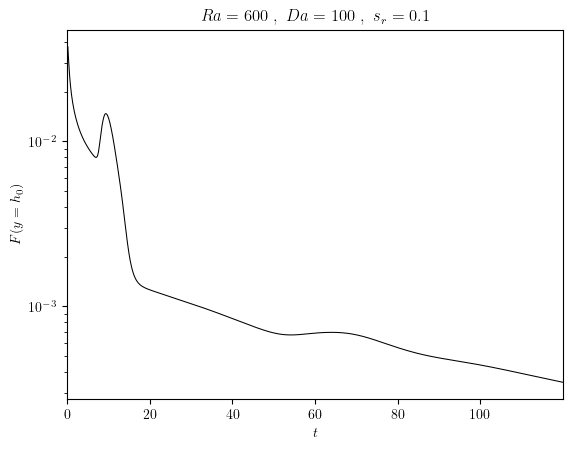

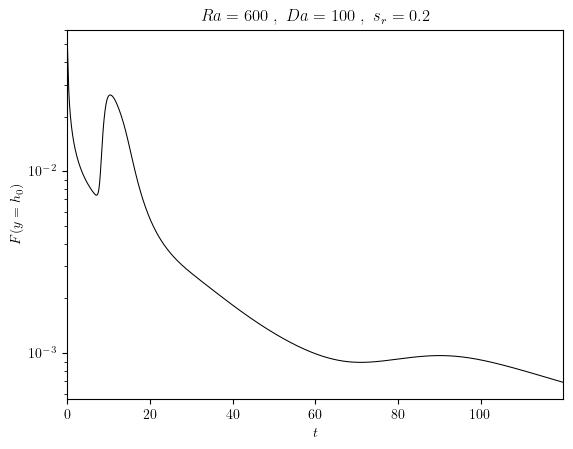

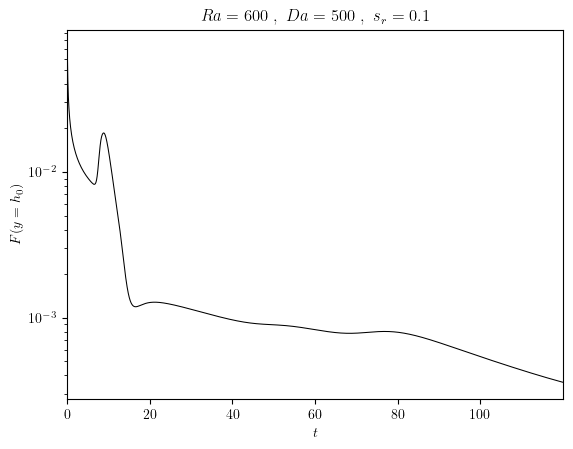

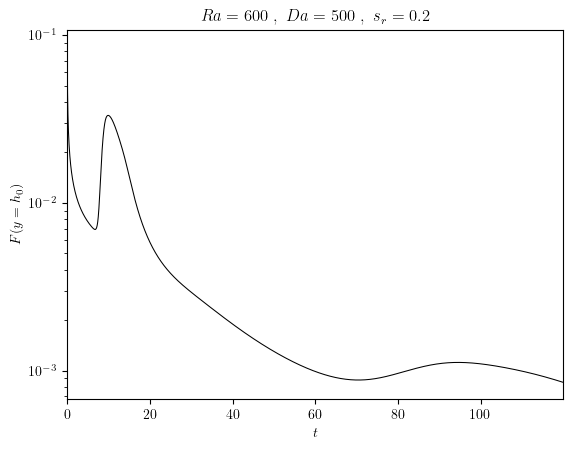

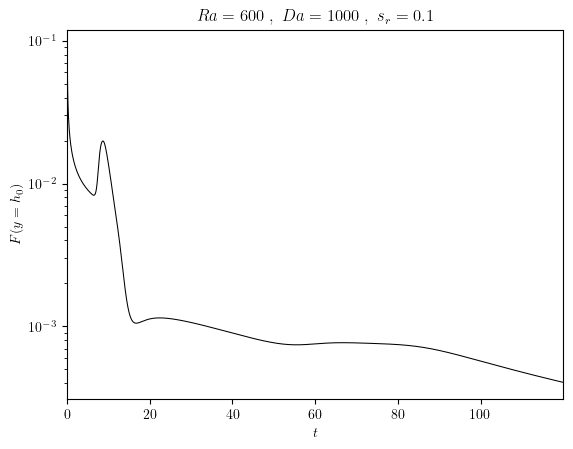

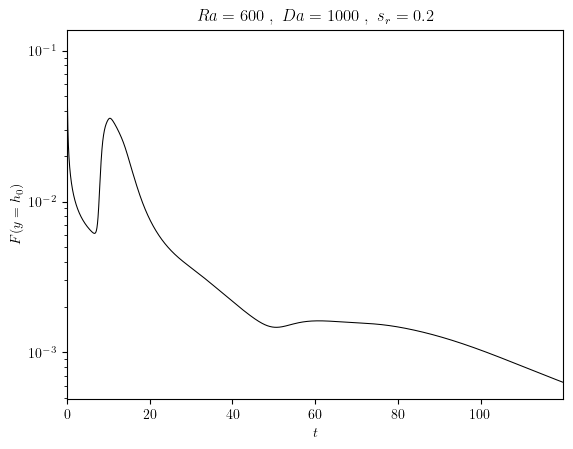

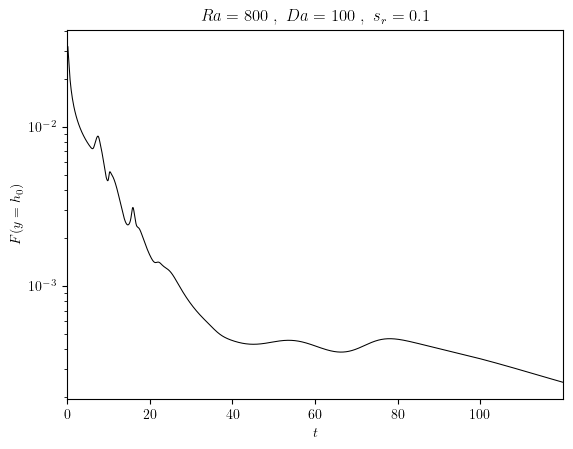

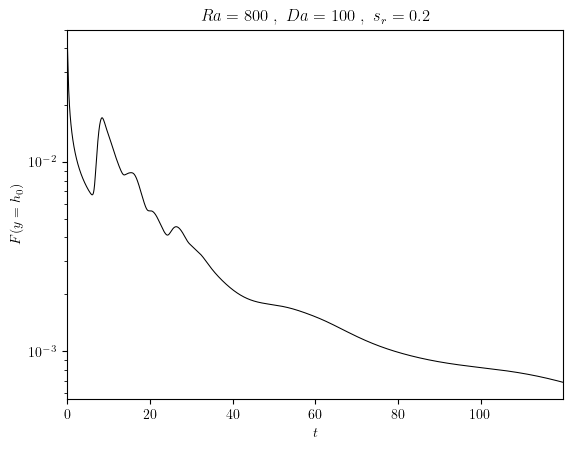

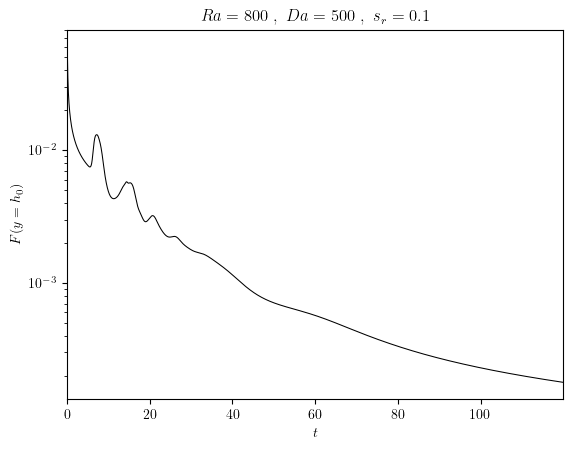

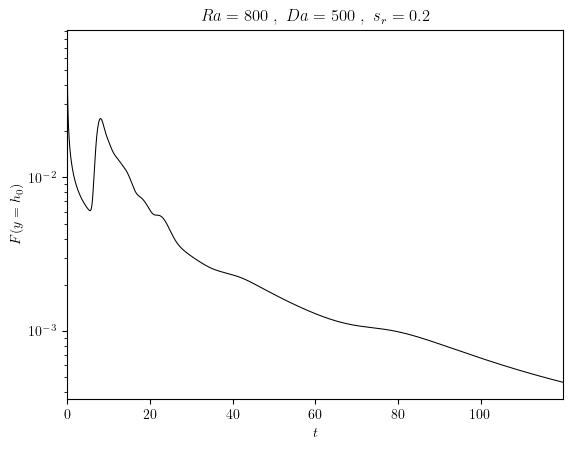

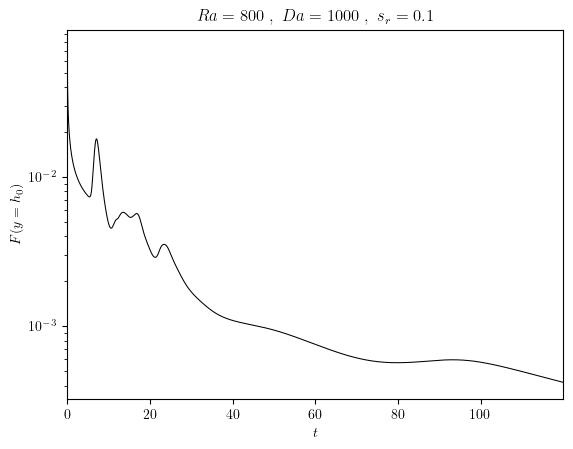

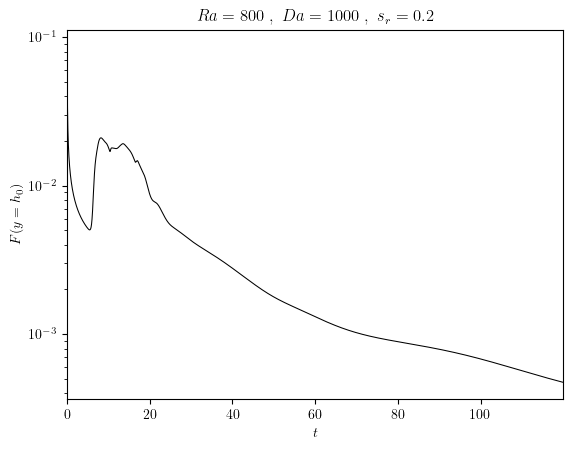

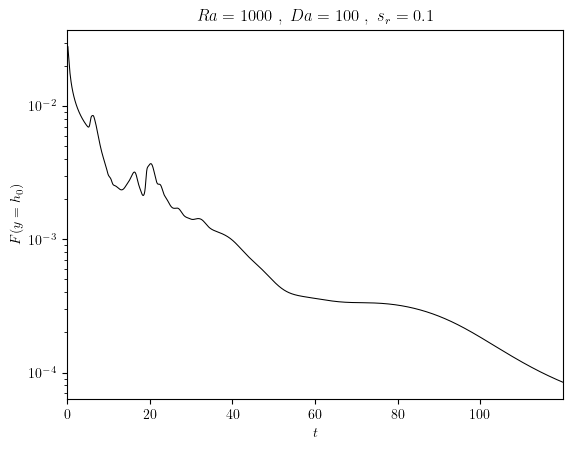

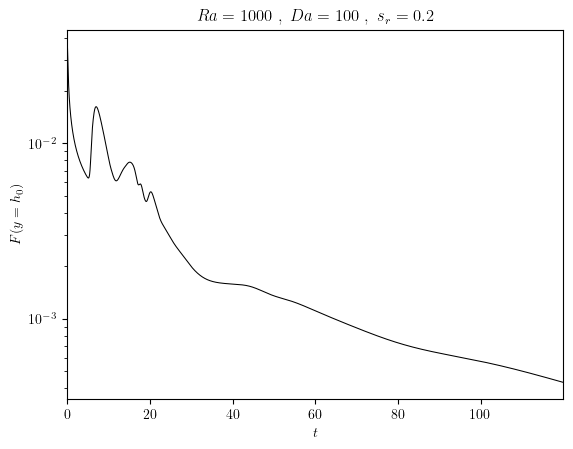

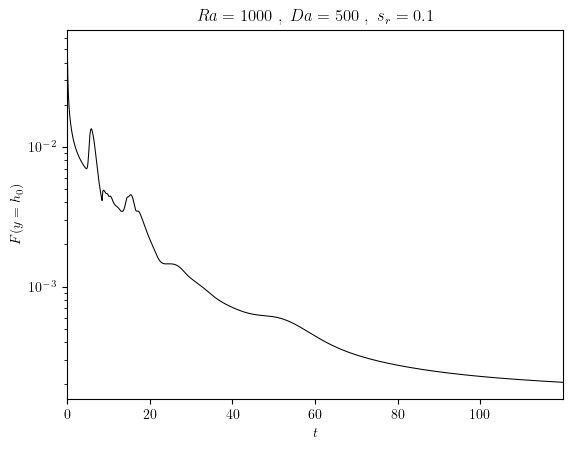

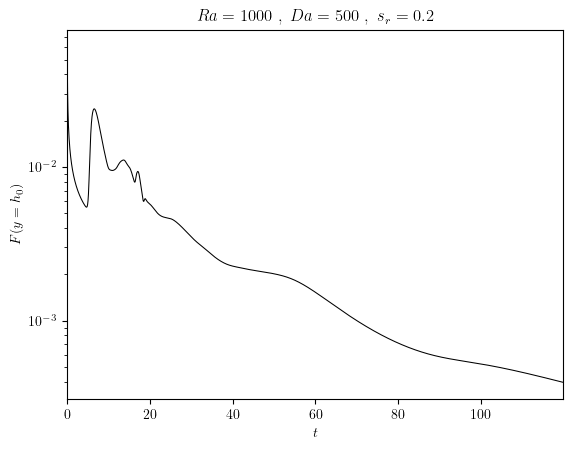

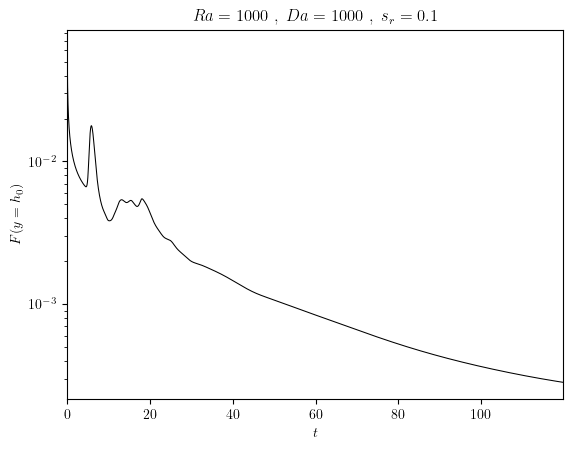

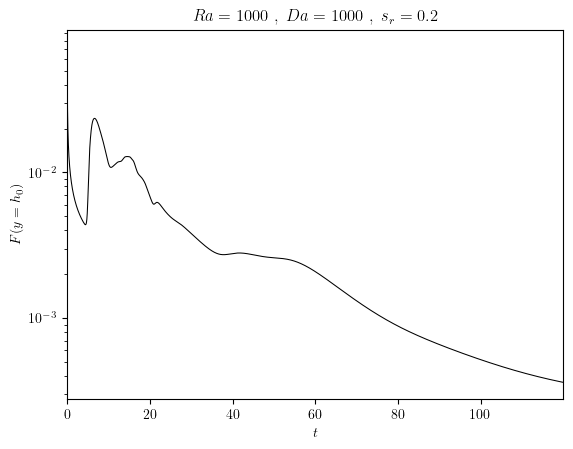

In [40]:
Lx = 2.0

for Ra_Da_sr, flux in fdS.items():
    Ra, Da, sr = Ra_Da_sr
    if sr == 0.05:
        continue
    flux_h0 = [i[0] for i in flux.series]
    fdiff_h0 = [(1 / Lx) * f_diff for _, f_diff in flux_h0]
    fig, ax = plot_line(
        (flux.time_series, fdiff_h0),
        x_label='$t$',
        y_label=f'$F(y=h_0)$',
        title=f'$Ra={Ra}~,~Da={Da}~,~s_r={sr}$')
    ax.set_yscale('log')
    # ax.hlines(8e-4, [flux.time_series[0]], [flux.time_series[-1]], ls='dashed', lw=0.5, color='black')

In [5]:
mD = load_numeric_series('mD', directory, NUMERIC_SERIES)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

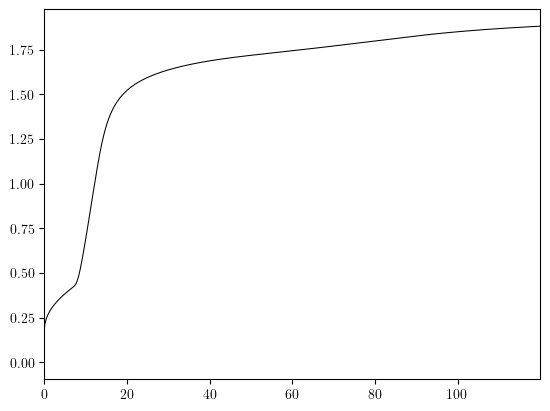

In [7]:
plot_line((mD.time_series, mD.series))